<a href="https://colab.research.google.com/github/rukka0808/Machine-Learning-Study/blob/main/soul_Multi_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al 'drive/MyDrive/data'

total 2268857
-rw------- 1 root root    337847 Jun 18 04:24 data_202001.csv
-rw------- 1 root root    314682 Jun 18 04:24 data_202002.csv
-rw------- 1 root root    335953 Jun 18 04:24 data_202003.csv
-rw------- 1 root root   4052564 Jun 18 04:24 data_2020.csv
-rw------- 1 root root    337176 Jun 25 03:40 output.csv
-rw------- 1 root root 757939580 Feb 14 23:37 TCS_11_03_02_339640.csv
-rw------- 1 root root 732586920 Mar 14 23:42 TCS_11_03_02_663167.csv
-rw------- 1 root root 827403150 Apr 14 23:36 TCS_11_03_02_717062.csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
file = "drive/MyDrive/data/data_2020.csv"
data = pd.read_csv(file)
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [4]:
data['도착영업소코드'] = data['도착영업소코드'].map({105: 20, 110: 77, 115: 135, 120: 185, 125: 240, 130: 215, 135: 339, 140: 407})

In [5]:
data.rename(columns={'도착영업소코드': '거리'}, inplace=True)

거리가 407인 값만 추출

In [6]:
data_destination = data[data['거리'].isin([407])]

In [7]:
data_destination

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
292,20200101,6,101,407,15824,2
293,20200101,6,101,407,19623,2
294,20200101,9,101,407,18048,2
295,20200101,17,101,407,17979,2
296,20200101,11,101,407,17349,2
...,...,...,...,...,...,...
152713,20201231,9,101,407,14460,3
152856,20201231,16,101,407,14947,3
152857,20201231,17,101,407,15328,3
152861,20201231,20,101,407,17001,3


In [8]:
data_time = data_destination.groupby(['집계시','요일','거리'])['통행시간'].mean()
data_time

집계시  요일  거리 
0    0   407    15549.675676
     1   407    15983.102564
     2   407    15129.750000
     3   407    14533.189189
     4   407    15908.275000
                    ...     
23   2   407    16006.125000
     3   407    16118.288889
     4   407    17035.450980
     5   407    16033.622222
     6   407    15297.022727
Name: 통행시간, Length: 168, dtype: float64

In [9]:
data_distance = data_time.unstack(level=-1)
data_distance

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [10]:
data_distance.dropna()

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [12]:
data_out = data_distance.reset_index()

In [13]:
data_out

거리,집계시,요일,407
0,0,0,15549.675676
1,0,1,15983.102564
2,0,2,15129.750000
3,0,3,14533.189189
4,0,4,15908.275000
...,...,...,...
163,23,2,16006.125000
164,23,3,16118.288889
165,23,4,17035.450980
166,23,5,16033.622222


In [15]:
data_list=data_out.values.tolist()

In [18]:
data_list[:5]

[[0.0, 0.0, 15549.675675675675],
 [0.0, 1.0, 15983.102564102564],
 [0.0, 2.0, 15129.75],
 [0.0, 3.0, 14533.18918918919],
 [0.0, 4.0, 15908.275]]

In [19]:
x_train = [r[:2] for r in data_list]
y_train = [r[-1] for r in data_list]

In [20]:
x_train[:5], y_train[:5]

([[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0]],
 [15549.675675675675,
  15983.102564102564,
  15129.75,
  14533.18918918919,
  15908.275])

In [21]:
x1= [r[0] for r in data_list]
x2= [r[1] for r in data_list]
y= [r[-1] for r in data_list]

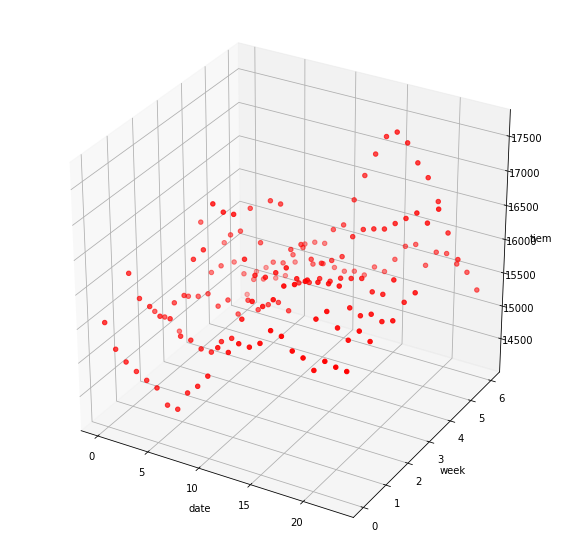

In [24]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('date')
ax.set_ylabel('week')
ax.set_zlabel('tiem')
plot = ax.scatter3D(x1, x2, y,c='r')
plt.show()

multi variable using Tensorflow

In [26]:
import tensorflow as tf
import numpy as np

In [30]:
learning_rate = 1e-4
learning_epochs = 1500

In [28]:
# Stochastic gradient descent (SGD) Optimizer
sgd =  tf.keras.optimizers.SGD(learning_rate=learning_rate)
# Mean Square Error (MSE) loss function
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(2,)))

model.compile(loss=mse, optimizer=sgd)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Train the model
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/1500
6/6 [==============================] - 1s 3ms/step - loss: 221435520.0000
Epoch 2/1500
6/6 [==============================] - 0s 2ms/step - loss: 161219712.0000
Epoch 3/1500
6/6 [==============================] - 0s 2ms/step - loss: 122088920.0000
Epoch 4/1500
6/6 [==============================] - 0s 2ms/step - loss: 97081872.0000
Epoch 5/1500
6/6 [==============================] - 0s 2ms/step - loss: 81587872.0000
Epoch 6/1500
6/6 [==============================] - 0s 3ms/step - loss: 71568416.0000
Epoch 7/1500
6/6 [==============================] - 0s 2ms/step - loss: 64978388.0000
Epoch 8/1500
6/6 [==============================] - 0s 2ms/step - loss: 60791656.0000
Epoch 9/1500
6/6 [==============================] - 0s 2ms/step - loss: 58091848.0000
Epoch 10/1500
6/6 [==============================] - 0s 2ms/step - loss: 56439788.0000
Epoch 11/1500
6/6 [==============================] - 0s 2ms/step - loss: 55283260.0000
Epoch 12/1500
6/6 [==============================

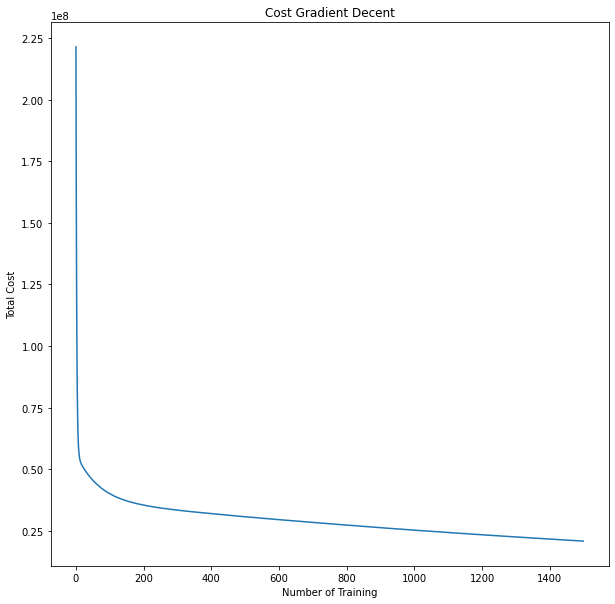

In [32]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.title('Cost Gradient Decent')
plt.ylabel('Total Cost')
plt.xlabel('Number of Training')
plt.show()

In [33]:
for step in range(learning_epochs):
    if step % 100 == 0:
        cost_val = history.history['loss'][step]
        print("%20i %20.5f" %(step, cost_val))

                   0      221435520.00000
                 100       40080008.00000
                 200       35462572.00000
                 300       33409872.00000
                 400       31956086.00000
                 500       30709988.00000
                 600       29538806.00000
                 700       28430336.00000
                 800       27333994.00000
                 900       26279632.00000
                1000       25299880.00000
                1100       24318596.00000
                1200       23404972.00000
                1300       22520168.00000
                1400       21661534.00000


In [34]:
Time = 14 #@param {type:"slider", min:0, max:23, step:1}
Day  = 3 #@param {type:"slider", min:0, max:6, step:1}

In [35]:
time_condition = data_out['집계시'] == Time
day_condition = data_out['요일'] == Day
data_out[time_condition & day_condition]

거리,집계시,요일,407
101,14,3,15936.189655


In [36]:
input = [ Time, Day ]
time = model.predict([input])
ml_time = time[0][0]
week_days = ['월', '화', '수', '목', '금', '토', '일']
print("%10s %10s %50s" % ('집계시', '요일', '서울에서 부산까지 통행시간')+'\n')
print("%10s %10s %50s" % ( str(Time), week_days[Day], str(ml_time)))

       집계시         요일                                     서울에서 부산까지 통행시간

        14          목                                          15166.188
